# Summary Report

## Introduction

* In this report we present a comprehensive spatio-temporal analysis of weather metrics such as snow fall(SNOW), snow depth (SNWD), minimum temperature (TMIN), maximum temperature(TMAX), observed temperature(TOBS) and precipitation (PRCP) for the state of Montana (MT). 
* Here space variation is captured by elevation, distance to shore, latitute and longitude and time is measure at yearly scale.
* We try to derive insights from the data by first finding the few key components that explain most of the data, which is measured by variance explained, this is done by using Principal Component Analysis.
* Then we try to determine if the major factor accounting for the observed phenomenon is across region or time, which is validated by linear regression.

* The effect of eigen coefficient is infered by comparing how the snow depth varies for large and small values of the coefficient for each eigen vector (can be found in the Prepare_*.ipynb)
* The effect of time vs region is infered by performing iterative RMS reduction. Details can be found in Is *.ipynb

## Snow depth (SNWD) & Snow (SNOW)
* The key factors contributing to most of the variation in SNWD, referred to as eigen vectors are shown below, and the top three eigen vectors capture close to 95\% of the variance in the data. 
* The mean indicates that the snow depth is high arodund Jan-April time frame. The top eigen vector mimics the behavior of the mean, meaning that mean is just one of the component we account for. This means that a higher weight to the first eigen vector means more snow depth observed.
* In addition to that the second eigen vector indicates how early does the snow fall accumulation starts. Higher the value more earlier is the snow fall. Similarly lower the value of the coefficient later is the arrival of snow
* The third eigen vector is an indicator how long does the season last. Higher the value of coefficient longer is the season with snow fall. 

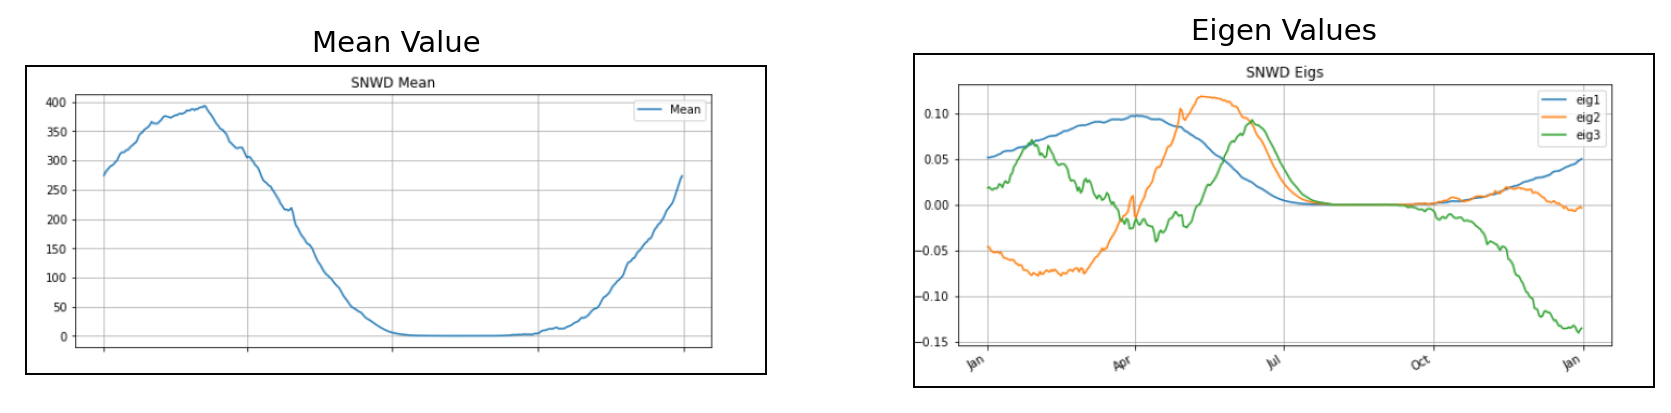

In [1]:
from source.plot_helper import plotImages
plotImages(['figs/snwd_mean.png','figs/snwd_eig.png'],['Mean Value',"Eigen Values"])

* We find that most of variation in snow depth comes from change in region than due to climate change over years.
* But on an average since 2000 there has been more snow across Montana. This can be confirmed by looking at the coeff_1 across years.
* This is because most of the snow depth variation across years is explained by the mean snow depth at each region. A total RMS reduction of around 50\% can be seen by removing mean station snow depth. While mean by year could explain only 5\% of the variation due to stations.
* Hence the regions with severe snow fall, early season can be spotted on the map based on the eigen coefficients.
* As can be seen the left most region of the map has many regions with heavy snow fall and also regions where snow fall starts in the year. This regions can be considered as vulnerable regions as far as snow accumulation is concerned.
* This hypothesis is quantized by performing regression with spatial variable parameter. For coefficient 1 we find elevation to be having the most significant impact on the snow depth. The p-Value  for the regression fit is 2.75549323e-27. 


* The snow fall (SNOW) parameter variation is similar to snow depth parameter. Snow fall is ahead in time (roughly 2-3 months) when compared with snow depth. This can be clearly observed by comparing the major eigen values of SNOW and SNWD (not shown here).
* And by considering the top 3 eigen vectors we can explain close to 80 \% of the variance in the data. 

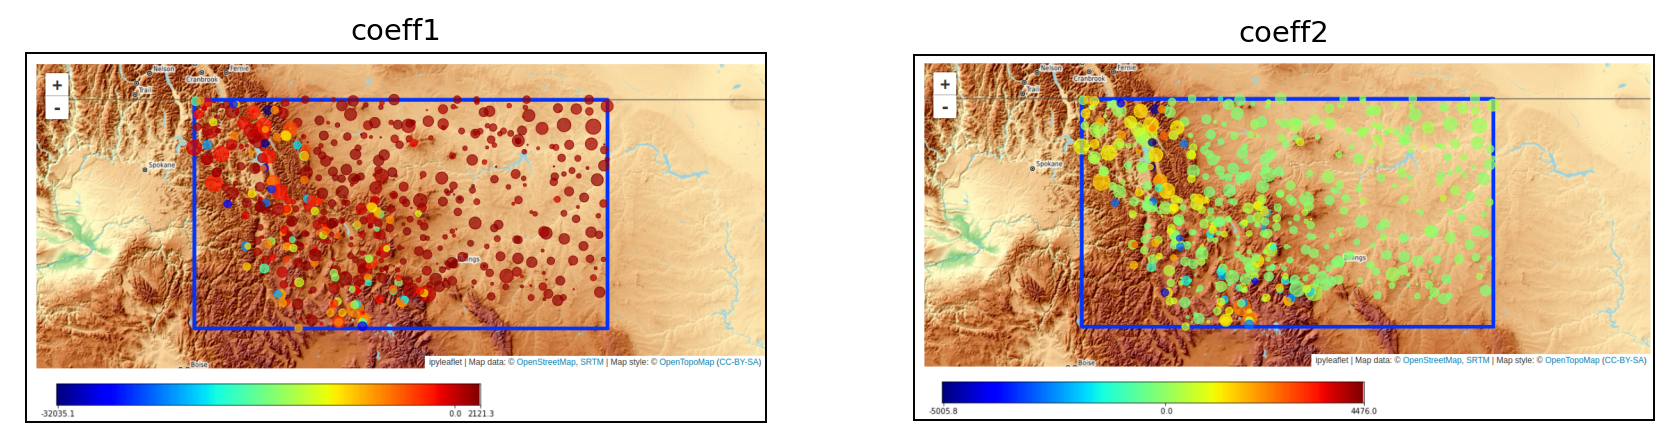

In [2]:
plotImages(['figs/snwd_map_coeff1.png','figs/snwd_map_coeff2.png'],['coeff1',"coeff2"])

## Precipitation (PRCP)
* Precipitation was found to be very spiky through out the years and across the stations. Making it hard to extract key variation effectively. Hence we use a smooth version of PRCP known as PRCP_S20 (smoothened over 20 days). By this we are able to explain roughly 80\% of the variance of the data.
* The mean and top three eigen vectors are shown below. It can be seen that the mean vector is very similar to that of the top eigen vector. Hence a large negative value indicates that there is on an average large amount of rainfall. 
* Similarly second eigen vector is positive during winter months and also during fall months. Meaning a high positive value indicates that we can expect high precipitation during these seasons compared to spring/summer.
* The third eigen vector has a large value during summer and fall months indicating that high PRCP during later part of the year, that is the mean shifted to right by few months. Hence this indicates if the PRCP is late or early. Large negative bolsters the mean prediction and indicates early start of the season.

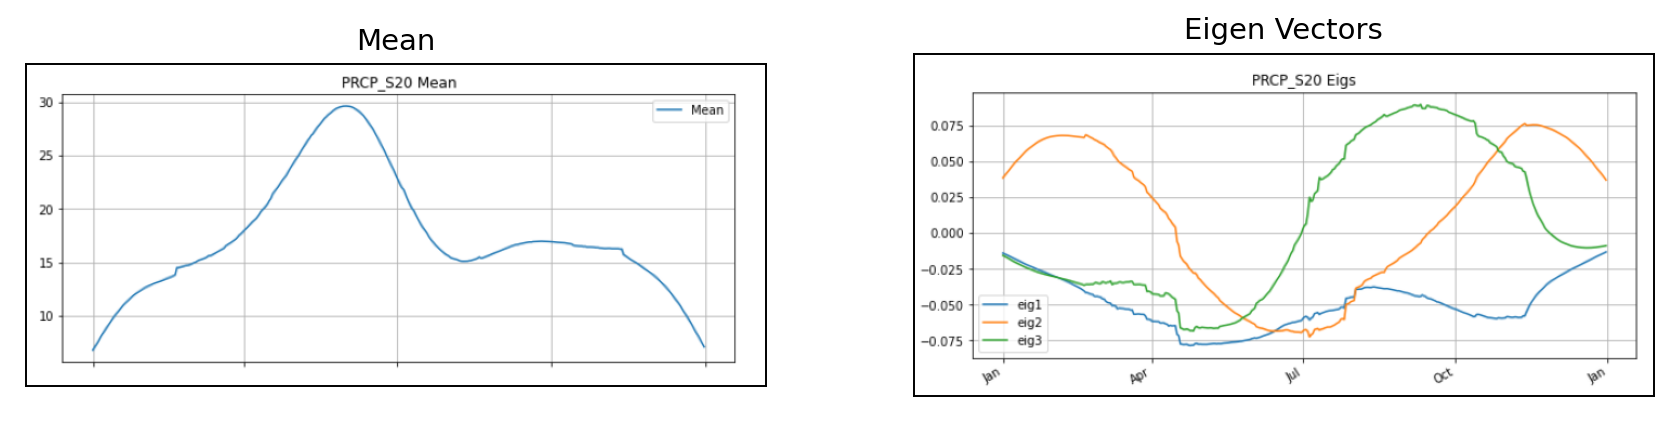

In [3]:
plotImages(['figs/prcp_mean.png','figs/prcp_eig.png'],['Mean',"Eigen Vectors"])

* We find that most of variation in PRCP depth comes from change in region than due to climate change over years.
* That being said we also notice that on an average the precipitation is increasing since 1980 in Montana.
* This is because most of the PRCP variation across years is explained by the mean PRCP at each region. A total RMS reduction of around 6x for coeff 2 and 7x for coeff 1 can be seen by removing mean station snow depth. But the overall reduction in RMS contributed by station mean is still less than 10\% indicating that precipitation is sporadic.
* Hence the regions with severe precipitation, early season can be spotted on the map based on the eigen coefficients.
* As can be seen the left most region of the map has many regions with heavy precipitation. This regions can be considered as vulnerable regions as far as precipitation is concerned.
* This hypothesis is quantized by performing regression with spatial variable parameter. We find elevation to be having the most significant impact on the snow depth. The p-Value  for the regression fit is 4.25306998e-20. Similarly for coeff 2 distance to coast has the most impact with p-Value being 1.63197206e-14.

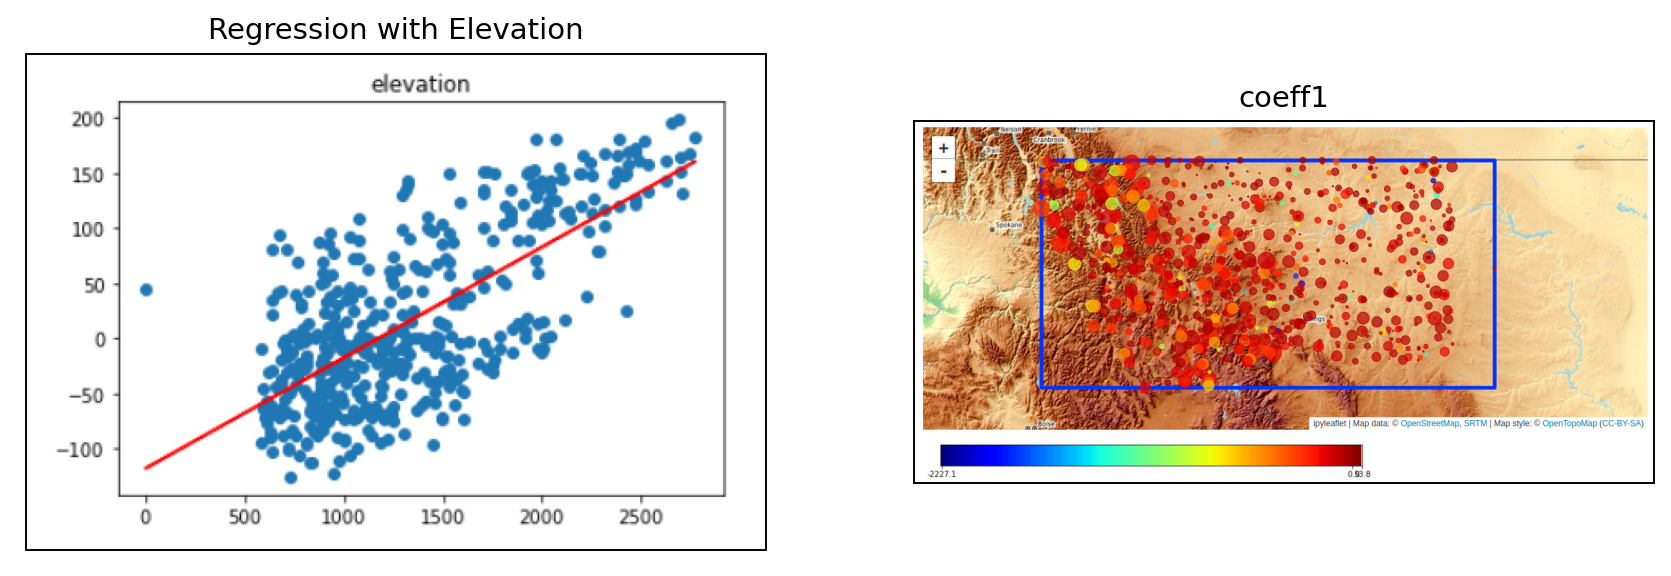

In [4]:
plotImages(['figs/prcp_s20_reg_elevation.png','figs/prcp_s20_map_coeff1.png'],['Regression with Elevation',"coeff1"])

## Temperature Observed (TOBS)
* TOBS was found to be very spiky through out the years and across the stations. Making it hard to extract key variation effectively. Hence we use a smooth version of TOBS known as TOBS_S10 (smoothened over 10 days). By this we are able to explain roughly 80\% of the variance of the data.
* The mean and top three eigen vectors are shown below. It can be seen that the mean vector is like inverted version of the top eigen vector. Hence a large negative value indicates that there is on an average higher temperatures observed. 
* Similarly second eigen vector is positive during winter months and also during fall months. Meaning a high positive value indicates that we can expect warmer weather during these seasons.
* The third eigen vector has a negative value during spring and positive values during summer months indicating that cooler spring and hotter summer can be expected if the coefficient is high.

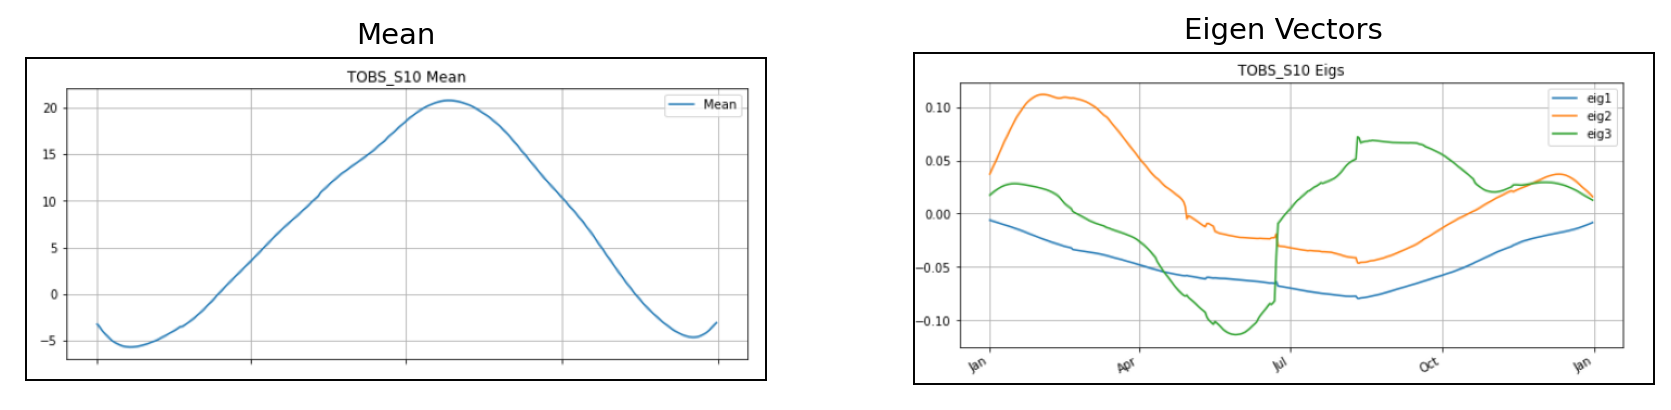

In [5]:
plotImages(['figs/tobs_s10_mean.png','figs/tobs_s10_eig.png'],['Mean',"Eigen Vectors"])

* TOBS is a function of station rather than being a function of year. The coefficients for different location can thus be looked at to decide the average TOBS and cooler summer or warmer winters.
* But there is an on average higher temperature recorded from 1980 onwards.
* From coeff 1, which controls the average heat, we see that it depends largely on the elevation with p-Value of 4.63142477e-22. And this relation indicates that as elevation increases coeff 1 increases thus TOBS reduces.
* From coeff 2, which controls the how warm are the winters, we see that again elevation  plays a significant role and as elevation increases winters are warmer.
* The plot below shows the regions which are warmer on average and those regions which have warmer winters.
* From the plot on left we see that regions on the left side are more warmer and also have warmer winters.

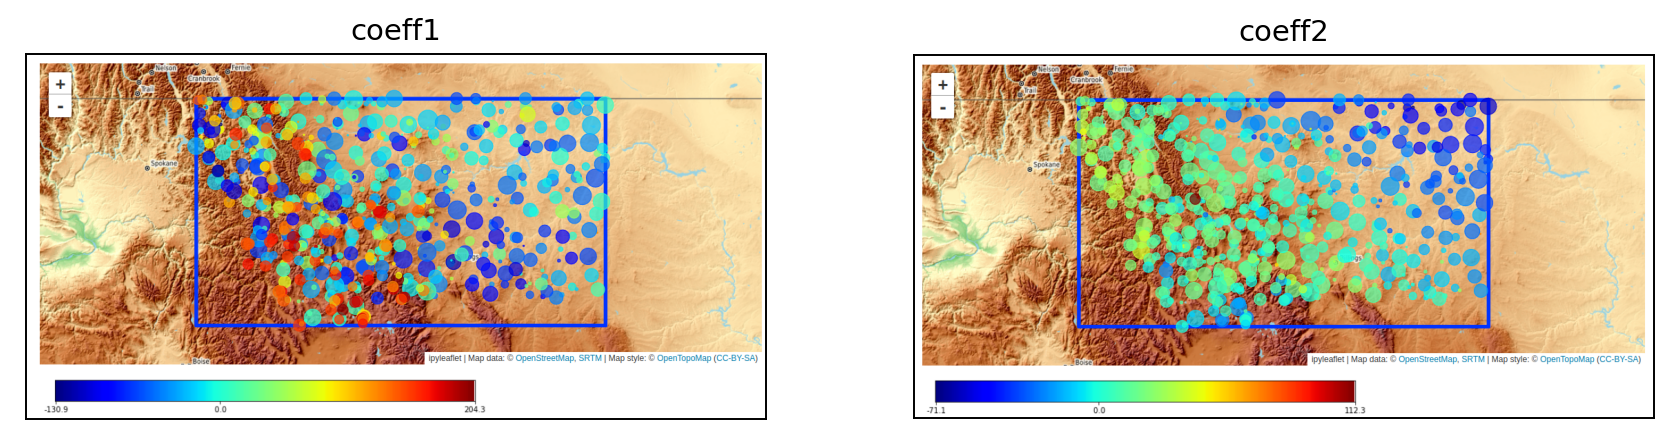

In [6]:
plotImages(['figs/tobs_s10_map_coeff1.png','figs/tobs_s10_map_coeff2.png'],['coeff1',"coeff2"])

## Temperature Minimum (TMIN) and Temperature Maximum (TMAX)
* TMIN is the minimum temperature observed in a particular day and the since the it can occur at any time during the day the value is fluctuates quickly in time. Hence we considered the smoothened version of the value TMIN_S20.
* Similarly TMAX is the maximum temperature observed in a particular day and fluctuates quickly in time. Hence we considered the smoothened version of the value TMAX_S20.
* The top 3 eigen vectors for TMIN and TMAX (not shown here) are very similar to that of TOBS hence their effect is similar to that of TOBS.
* The table below shows the RMS error for the regression for coeff 1 and coeff 2 for all the six metrics

| Observation | RMS Coeff 1 | RMS Coeff 1 |
| :- | -: | :-: |
| SNOW | 2346.0894521479536 | 2298.4123505428092
| SNWD | 18074.830549123693 | 3872.531179283249
| TOBS | 2524.0930142038114 | 2485.0963902469866
| TMIN | 2512.875157204422 | 2487.5120255762727
| TMAX | 2494.572993763284 | 2499.852810667673
| PRCP | 2760.057102173171 | 2514.674068518134

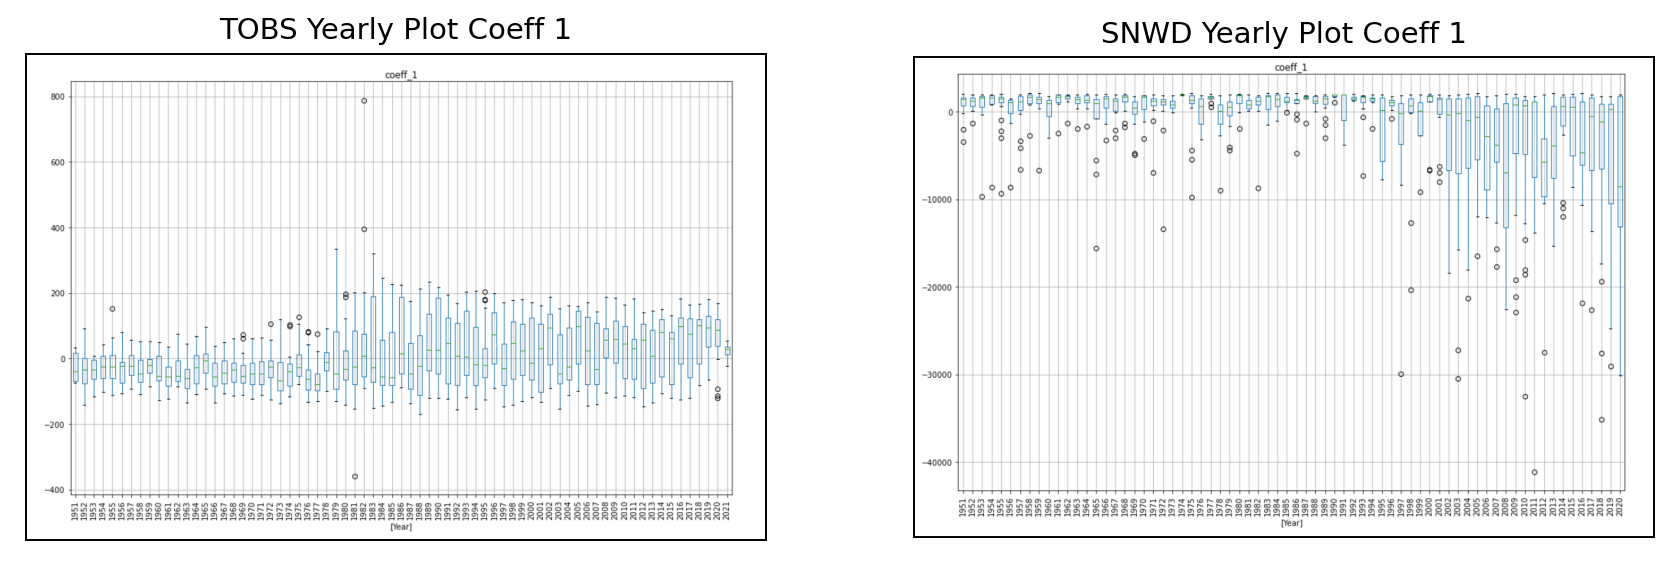

In [7]:
plotImages(['figs/tobs_year_plot.png','figs/snwd_time_plot.png'],['TOBS Yearly Plot Coeff 1',"SNWD Yearly Plot Coeff 1"])

## Conclusion
* The state of Montana most of the weather metric sensitive to elevation and distance to coast.
* Geographically the north-western region being on a highly elevated space seems to have most variation to amount of snow, average temperature and precipitation (confirmed through regression p-Values)
* There is a slight increasing trend seen in temperature and precipitation since 1980's and increase in snow can be seen from 2000 onwards.